<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Association_Rules(Book).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url ='https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/book.csv'

In [3]:
book = pd.read_csv(url)

In [4]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


EDA

In [6]:
#Generating list of Purchased and Not Purchased 
zero =[]
one = []

for i in book.columns:
  zero.append(list(book[i].value_counts())[0])
  one.append(list(book[i].value_counts())[1])

In [7]:
count_df = pd.DataFrame([zero,one], columns=book.copy().columns)
count_df


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
1,846,495,862,564,429,482,552,227,74,97,217


In [8]:
#counting how many books are purchased

count_df.index = ['Not_Purchased', 'Purchased']
count_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
Not_Purchased,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
Purchased,846,495,862,564,429,482,552,227,74,97,217


In [9]:
print("Maximum purchased item:" ,count_df.idxmax(axis=1)[1],':',count_df.loc['Purchased'].max())
print("Minimum purchased item:" ,count_df.idxmax(axis=1)[0],':',count_df.loc['Purchased'].min())

Maximum purchased item: CookBks : 862
Minimum purchased item: ItalAtlas : 74


In [10]:
count_df.idxmax(axis="columns")

Not_Purchased    ItalAtlas
Purchased          CookBks
dtype: object

In [11]:
sorted_df = pd.DataFrame(count_df.sort_values(by = ['Purchased'], axis=1, ascending=False).transpose())
sorted_df

,Not_Purchased,Purchased
CookBks,1138,862
ChildBks,1154,846
DoItYBks,1436,564
GeogBks,1448,552
YouthBks,1505,495
ArtBks,1518,482
RefBks,1571,429
ItalCook,1773,227
Florence,1783,217
ItalArt,1903,97


In [12]:
#Most Purchased book is CookBks. While the ItalAtlas is least Purchased book.

In [13]:
#percentage of books purchsed

sorted_df['Purchased %']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df

,Not_Purchased,Purchased,Purchased %
CookBks,1138,862,0.177915
ChildBks,1154,846,0.174613
DoItYBks,1436,564,0.116409
GeogBks,1448,552,0.113932
YouthBks,1505,495,0.102167
ArtBks,1518,482,0.099484
RefBks,1571,429,0.088545
ItalCook,1773,227,0.046852
Florence,1783,217,0.044788
ItalArt,1903,97,0.020021


In [14]:
np.mean(sorted_df['Purchased %'])

0.09090909090909091

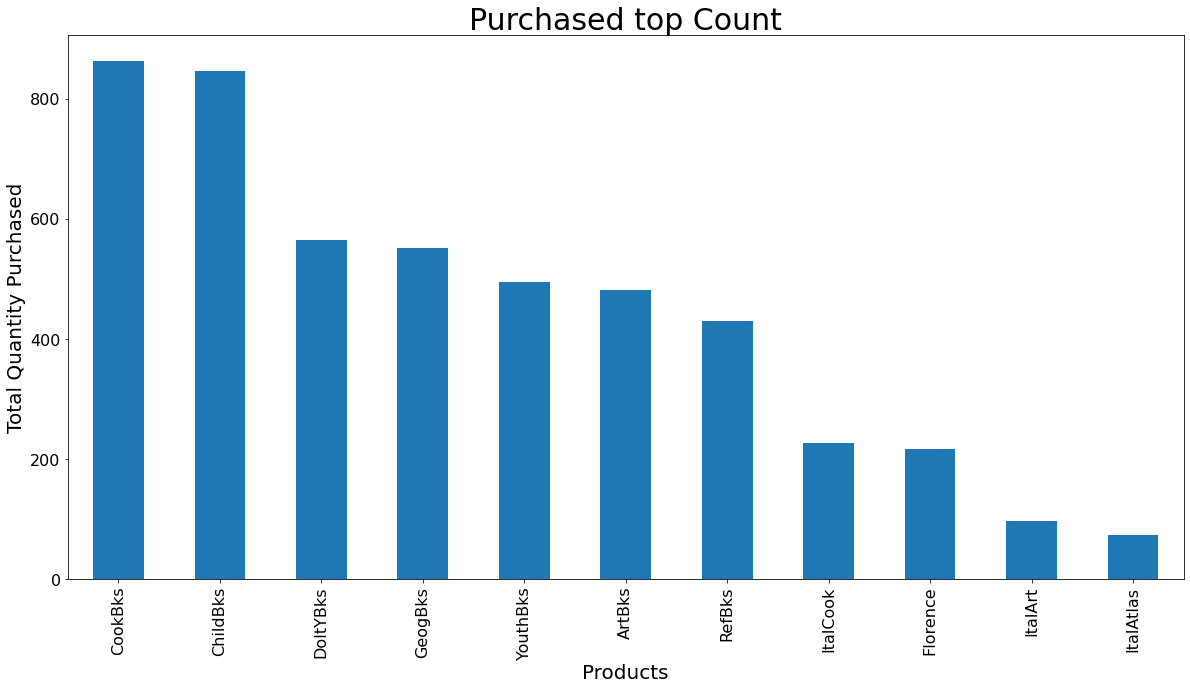

In [15]:
fig = plt.subplots(figsize=(20,10))

purchased = sorted_df.head(50).xs('Purchased' , axis=1)

purchased.plot(kind='bar', fontsize=16)

plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('Total Quantity Purchased', fontsize=20)
plt.show()

### Using Aproiri Rule

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(book, min_support=0.05, use_colnames=True, max_len=3)

In [17]:
freq_items.shape

(76, 2)

In [18]:
freq_items.tail(5)

,support,itemsets
71,0.0640,"(GeogBks, CookBks, ItalCook)"
72,0.0535,"(ArtBks, RefBks, DoItYBks)"
73,0.0585,"(RefBks, GeogBks, DoItYBks)"
74,0.0730,"(ArtBks, GeogBks, DoItYBks)"
75,0.0565,"(ArtBks, RefBks, GeogBks)"


### Building Association rules using confidence metrics

In [19]:
confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

In [20]:
confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [21]:
confidence_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
269,"(GeogBks, DoItYBks)",(ArtBks),0.1325,0.2410,0.0730,0.550943,2.286072,0.041067,1.690210
270,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
271,(GeogBks),"(ArtBks, DoItYBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
272,(DoItYBks),"(ArtBks, GeogBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
273,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
274,"(ArtBks, GeogBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
275,"(RefBks, GeogBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
276,(ArtBks),"(RefBks, GeogBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
277,(RefBks),"(ArtBks, GeogBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502
278,(GeogBks),"(ArtBks, RefBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866


###Building Association rules using lift metrics

In [22]:
lift_association = association_rules(freq_items, metric='lift', min_threshold=1)

In [23]:
lift_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
284,"(GeogBks, DoItYBks)",(ArtBks),0.1325,0.2410,0.0730,0.550943,2.286072,0.041067,1.690210
285,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
286,(GeogBks),"(ArtBks, DoItYBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
287,(DoItYBks),"(ArtBks, GeogBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
288,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
289,"(ArtBks, GeogBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
290,"(RefBks, GeogBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
291,(ArtBks),"(RefBks, GeogBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
292,(RefBks),"(ArtBks, GeogBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502
293,(GeogBks),"(ArtBks, RefBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866


###Removing Redundancy

In [24]:
#Removing redundant sets

In [25]:
redundancy = lift_association.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


In [26]:
redundancy.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
289,"(CookBks, ItalCook)",(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
290,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
291,(DoItYBks),"(CookBks, ItalCook)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
292,"(GeogBks, ItalCook)",(ChildBks),0.0640,0.4230,0.0525,0.820312,1.939273,0.025428,3.211130
293,(ChildBks),"(GeogBks, ItalCook)",0.4230,0.0640,0.0525,0.124113,1.939273,0.025428,1.068632


In [27]:
#An leverage value of 0 indicates independence. Range will be [-1 1].

#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

###Finding Unique Sets

In [28]:
unique_rules = redundancy.iloc[::1]
unique_rules.shape

(294, 9)

In [29]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
5,(DoItYBks),"(ChildBks, CookBks)",0.282,0.256,0.1460,0.517730,2.022385,0.073808,1.542706
6,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
7,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
8,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
9,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


In [30]:
#ChildBks, CookBks and GeogBks, DoItYBks are bought together.

###Generated Rules analysis

In [31]:
#Rules sorted with respect to lift

top_sort = unique_rules[unique_rules['lift']>1.5]

In [32]:
top_sored = top_sort.sort_values(by='lift', ascending = False)
top_sort.reset_index(inplace=True)
top_sort = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


In [33]:
#ChildBks, CookBks, GeogBks have a lift of >1.5

In [34]:
x = top_sort[['antecedents','consequents']]

In [35]:
# top sorted Antecedents

item_list = [] 
for i in x.antecedents.to_list(): 
    for j in list(set(i)):
        item_list.append(j)

In [36]:
# top sorted consequents

item_list = []
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [39]:
#generating unique list of items (# without redundacy)

def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    
    # convert the set to the list 
    unique_list = (list(list_set))
    
    top_items =[]
    for m in unique_list:
        top_items.append(m)
        
    print('top_items')

###Concluding top_items and the shuffled combination of top lift result

In [40]:
unique(item_list)

top_items


###Trying different values of Support, Confidence, Max_len and Min_thershold

In [41]:
frequent_books_s = apriori(book, min_support = 0.005, max_len = 3, use_colnames = True)

In [42]:
#sorting with respect to support
frequent_books_s.sort_values("support", ascending = False, inplace = True)

In [43]:
#generating association rules
rules = association_rules(frequent_books_s, metric = "lift", min_threshold= 1)

In [44]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
5,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
6,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
7,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
8,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
9,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347


In [45]:
#sorting rules with respect to lift
rules.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
743,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
351,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
354,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
564,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
561,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
924,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
921,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306


In [46]:
rules_r = rules.sort_values('lift', ascending = False)

In [47]:
#Min_support = 0.005, Max_len = 5, Lift, Min_threshold=1

In [48]:
frequent_books_2 = apriori(book, min_support = 0.005, max_len = 5, use_colnames = True)
rules2 = association_rules(frequent_books_2, metric = "lift", min_threshold= 1)

In [49]:
#Min_support = 0.005, Max_len = 4, Lift, Min_threshold=1

In [50]:
frequent_books_3 = apriori(book, min_support = 0.005, max_len = 4, use_colnames = True)
rules3 = association_rules(frequent_books_2, metric = "lift", min_threshold= 1)

In [51]:
#Min_support = 0.01, Max_len = 3, Lift, Min_threshold=1.5

In [52]:
frequent_books_4 = apriori(book, min_support = 0.01, max_len = 3, use_colnames = True)
rules4 = association_rules(frequent_books_4, metric = "lift", min_threshold= 1.5)

In [53]:
#Min_support = 0.05, Max_len = 3, Confidence, Min_threshold = 0.8

In [54]:
frequent_books_5 = apriori(book, min_support = 0.05, max_len = 3, use_colnames = True)
rules5 = association_rules(frequent_books_5, metric = "confidence", min_threshold= 0.8)

In [55]:
#Min_support = 0.1, Max_len = 3, Confidence, Min_threshold = 0.8

In [56]:
frequent_books_6 = apriori(book, min_support = 0.1, max_len = 3, use_colnames = True)
rules6 = association_rules(frequent_books_6, metric = "confidence", min_threshold= 0.8)

In [57]:
# Generating list for support and confidence

support=rules['support']
confidence=rules['confidence']

###Bar Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Support')

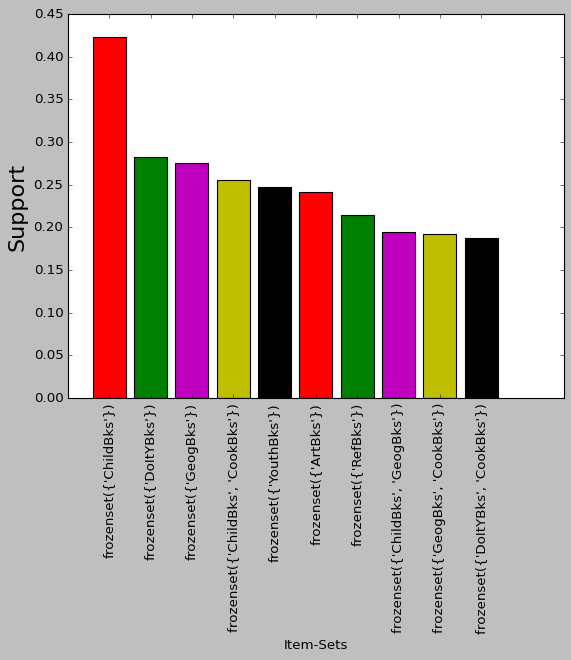

In [58]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_s.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_s.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Support')

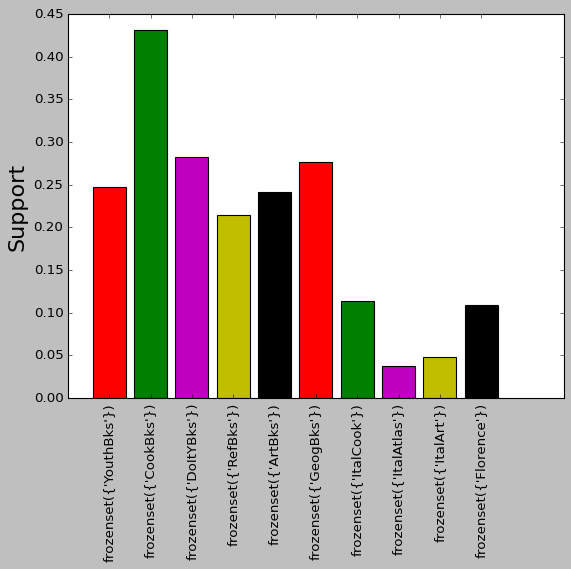

In [59]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_2.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_2.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Support')

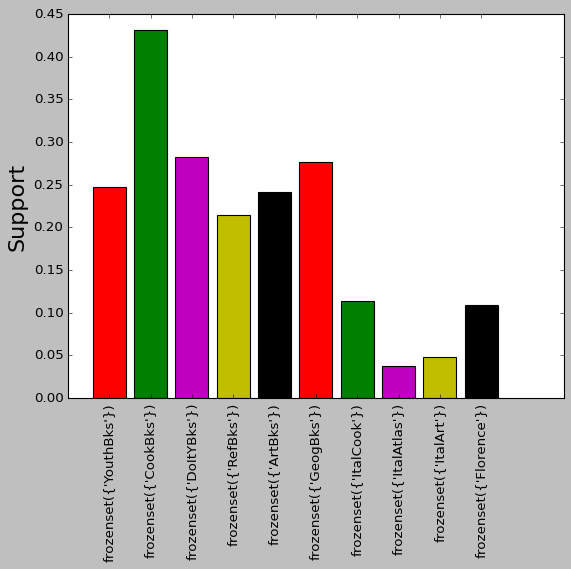

In [60]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_3.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_3.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Support')

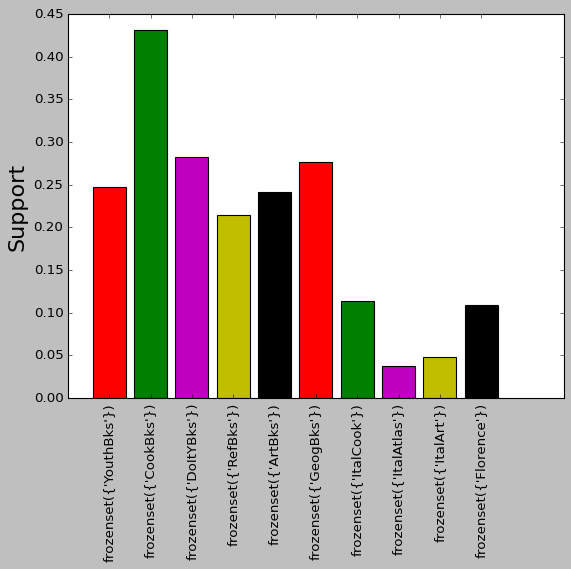

In [61]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_4.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_4.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Support')

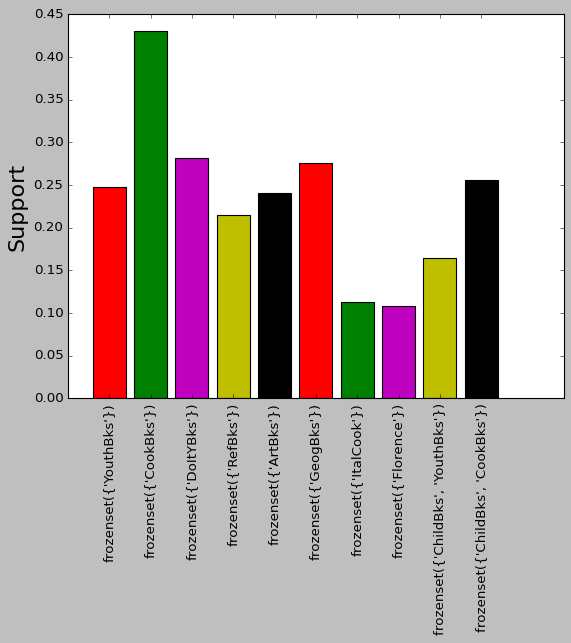

In [62]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_5.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_5.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Support')

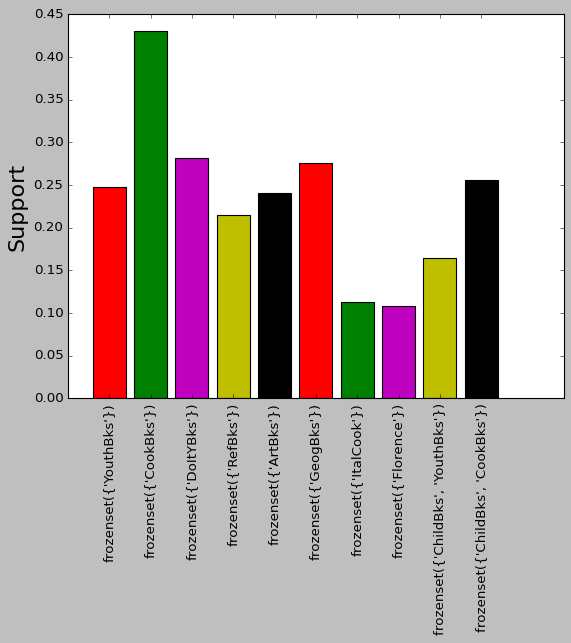

In [63]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_6.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_6.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

###Above plots shows the different number of sets we can produce with change in Support, confidence, Max_length and Min_thershold.